![Customer Churn Illustration](Images/Customer-Churn.webp)



# Business Understanding

- In the highly competitive telecommunications industry, customer churn (where customers stop using a company's services) presents a serious threat to profitability and long-term sustainability. Industry churn rates typically range from 15% to 25%, making it one of the most critical performance metrics to monitor and reduce.

- For SyriaTel, churn is more than just a number, it represents lost revenue, higher customer acquisition costs, and weakened market position. Studies show that acquiring a new customer is 5 to 20 times more expensive than retaining an existing one depending on the industry, thus reinforcing why customer retention is a strategic priority.

- SyriaTel offers a wide range of services including mobile calls, messaging, internet, and data bundles. Despite its reputation for customer service and social responsibility, the company continues to experience significant churn due to competitive pricing, service dissatisfaction, and customer disengagement. Left unaddressed, this churn could erode SyriaTel’s market share and damage brand loyalty.

## Objectives
- The primary objective of this project is to build a predictive model that can identify customers who are most likely to churn. By accurately predicting churn risk, SyriaTel can proactively implement targeted retention strategies to reduce churn and improve customer satisfaction.

- This project aims to:

   - Identify factors that contribute most to customer churn.

   - Classify customers as likely to churn ("True") or stay ("False").

   - Enable actionable insights to guide SyriaTel’s marketing, sales, and support teams in preventing churn.

   - Improve customer retention, thus reducing revenue loss and supporting long-term profitability.

## Stakeholders
- The key stakeholders for this project include:  
   - Marketing Team: Interested in identifying at-risk customers for targeted retention campaigns.
   - Customer Service Team: Needs to understand how support quality and call volume relate to churn and implement new escalation protocols based on churn risk.
   - Finace Team: Monitors revenue Impact from Customer loss and use this insights to forecast revenue and allocate budgets to retention.
   - Executive Team: Concerned with overall business performance and customer retention strategies.



# Data Understanding

## a) Dataset Overview

- The dataset provided contains customer-level usage and service information from SyriaTel, aimed at identifying patterns that lead to customer churn. 
- The dataset has 3333 rows which represents customers and 21 column which captures features that influence their decision to stay (Not churned) or leave(Churned) the service.

### Variable Description
There are 20 features (independent variables) and 1 target variable (churn). Below is a breakdown of each variable:

   - Customer Identity:
      1. state - This shows the state where the customer resides and it can be help identify geographic patterns in churn.
      2. area code - Associated with the customers Phone number.
      3. phone number - Customer's phone number (serves as an Unique identifier)

   -  Tenure - how long a customer has been with the company.
      1. account length- Duration of customer’s relationship with SyriaTel. 

   - Service Plan - what services the customer is subscribed to
      1. international plan- Indicates whether the customer has an international calling plan (`yes`/`no`)
      2. voice mail plan - Indicates whether the customer has subscribed to voice mail service plan (`yes`/`no`)

   - Usage Behaviour - Measures how actively customers use the services.
        - Daytime Usage 
            1. total day calls - Total number of calls made during the day
            2. total day minutes - Total number of minutes the customer has spent on calls during the day

      -  Evening Usage
            1. total eve minutes - Total minutes of calls made in the evening
            2. total eve calls - Total number of evening calls
  

      - Night Usage
           1. total night minutes- The total number of minutes the customer has spent on calls during the night.
           2. total night calls - The total number of calls the customer has made during the night

      - International Usage
           1. total intl minutes -  The total number of minutes the customer has spent on international calls.
           2. total intl calls  -  The total number of international calls the customer has made.

      - Voice Mail
           1. number vmail messages - Number of voice mail messages the customer has received.
 
   - Charges (Financial Impact) - Does billing higher charges lead to dissatisfaction.
      1. total night charge - The total charges incurred by the customer for nighttime calls.
      2. total intl charge - The total charges incurred by the customer for international calls.
      3. total eve charge - Total charges Incurred by the customer for evening call
      4. total day charge - Total charge incurred by the customer for daytime calls

   - Customer Support Interaction
      1. customer service calls - The number of times the customer has called customer service.

   - Target Variable  
      1. churn -  Whether the customer has churned (`True` = churned, `False` = active)

#### Libraries

In [977]:
# Creates interactive charts and maps
!pip install plotly

!pip install scikit-learn imbalanced-learn

!pip install -U scikit-learn



  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/b2/3b/47b5eaee01ef2b5a80ba3f7f6ecf79587cb458690857d4777bfd77371c6f/scikit_learn-1.7.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for threadpoolctl>=3.1.0 from https://files.pythonhosted.org/packages/32/d5/f9a850d79b0851d1d4ef6456097579a9005b31fea68726a4ae5f2d82ddd9/threadpoolctl-3.6.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.9 MB 682.7 kB/s eta 0:00:14
   ---------------------------------------- 0.0/8.9 MB 445.2 kB/s eta 0:00:20
   ---------------------------------------- 0.0/8.9 MB 445.2 kB/s eta 0:00:20
   ---------------------------------------- 0.0/8.9 MB 219.4 kB/s eta 0:00:41
   ---------------------------------------- 0.1/8.9 MB 302.7 kB/s eta 0:00:30
    --------------------------------------- 0.1/8.9 MB 437.6 kB/s eta 0:00:21
    -----------------------

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\A808865\\Python\\Lib\\site-packages\\~klearn\\decomposition\\_cdnmf_fast.cp311-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [944]:
# Essential for data manipulation and analysis
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt

# For statistical data visualization
import seaborn as sns

# creates interactive visualizations
import plotly.express as px

# Scales features to ensure they contribute equally to the model
from sklearn.preprocessing import StandardScaler




In [945]:
# Reading the CSV file & displaying the first 5 rows
df = pd.read_csv('Data\Customer_churn.csv')
df.head()

,state,area code,phone number,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,Total Revenu,customer service calls,churn
0,AK,408,341-9764,36,no,yes,30,146.3,128,24.87,...,13.81,129.3,109,5.82,14.5,6,3.92,48.42,0,False
1,AK,408,366-4467,104,no,no,0,278.4,106,47.33,...,6.89,163.2,137,7.34,9.8,5,2.65,64.21,1,False
2,AK,408,336-5406,78,no,no,0,225.1,67,38.27,...,16.93,175.5,102,7.90,14.6,2,3.94,67.04,0,False
3,AK,408,396-2335,110,no,no,0,100.1,90,17.02,...,19.83,204.4,57,9.20,11.1,8,3.00,49.05,3,False
4,AK,408,383-9255,127,no,no,0,182.3,124,30.99,...,14.44,184.0,116,8.28,9.3,3,2.51,56.22,1,False



## b) Data Processing

In this section, I prepare the data for exploratory data analysis (EDA) and modeling. The following checks was performed:

- Check the overall structiure of the dataset & SUmmary statistics
- Checking for missing values
- Irrelevant Columns - Removing columns that do not contribute to the analysis (Phone number) 
- Checking for Data types and converting to correct format if needed
- Duplicates - Identifying and removing any duplicate entries.
- Checking for Outliers

In [946]:
df.shape

(3333, 22)

In [947]:
# Data Types & Null Values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   area code               3333 non-null   int64  
 2   phone number            3333 non-null   object 
 3   account length          3333 non-null   int64  
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

- Categorical Variable:
   - state
   - area code
   - international plan
   - voicemail plan

- Numerical Variable: 
   - account length
   - number vmail messages
   - total day minutes
   - total day calls
   - total day charge
   - total eve minutes
   - total eve calls
   - total eve charge
   - total night minutes
   - total night calls
   - total night charge
   - total intl minutes
   - total intl charge
   - customer service calls


In [948]:
# Changing Data Types of Area Code and Phone Number to String
df['area code'] = df['area code'].astype(str)

df['phone number'] = df['phone number'].astype(str)

In [949]:
# Summary Statistics
df.describe().round(2)

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,Total Revenu,customer service calls
count,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00
mean,101.06,8.10,179.78,100.44,30.56,200.98,100.11,17.08,200.87,100.11,9.04,10.24,4.48,2.76,59.45,1.56
std,39.82,13.69,54.47,20.07,9.26,50.71,19.92,4.31,50.57,19.57,2.28,2.79,2.46,0.75,10.50,1.32
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23.20,33.00,1.04,0.00,0.00,0.00,22.93,0.00
25%,74.00,0.00,143.70,87.00,24.43,166.60,87.00,14.16,167.00,87.00,7.52,8.50,3.00,2.30,52.38,1.00
50%,101.00,0.00,179.40,101.00,30.50,201.40,100.00,17.12,201.20,100.00,9.05,10.30,4.00,2.78,59.47,1.00
75%,127.00,20.00,216.40,114.00,36.79,235.30,114.00,20.00,235.30,113.00,10.59,12.10,6.00,3.27,66.48,2.00
max,243.00,51.00,350.80,165.00,59.64,363.70,170.00,30.91,395.00,175.00,17.77,20.00,20.00,5.40,96.15,9.00


Key Observation from summary Statistics:
- Account Length: The average customer has been with SyriaTel for 101 days
- Voicemail Usage: Most customers do not use the voicemail feature, as shown by a median of 0 messages despite a mean of 8.1, indicating a strong skew that may help identify disengaged users.
- Call and Charge Metrics: The datasets shows the call & charge Usages in in three time periods: day, evening, and night
   - Daytime Usage shows the highest variability, with an average talk time of 179.8 minutes and an average charge of $30.56.
   - Evening Usage shows that the customers average 200.98 minutes with less variability and a lower average charge ($17.08).
   - Nighttime usage  is Similar to evening: around 200.87 minutes and $9.04 charge, with lower variability.
- International Usage is generally low, averaging 10.24 minutes and $2.76 in charges, with a 20-minute maximum, indicating that only a subset of users rely on this feature and may exhibit different churn behavior.
- While most customers contact customer service 1–2 times, those with up to 9 calls may reflect dissatisfaction, a strong potential indicator of churn.

In [950]:
# Unique Outputs
df.nunique()

state                       50
area code                    3
phone number              3333
account length             212
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
Total Revenu              2227
customer service calls      10
churn                        2
dtype: int64

In [951]:
# Displaying unique values
for column in df.columns:
    print(f"{column}:")
    print(f" - Unique Values: {df[column].unique()}...")  # Limiting to the first 5 unique values
    print("\n")

state:
 - Unique Values: ['AK' 'AL' 'AR' 'AZ' 'CA' 'CO' 'CT' 'WA' 'DE' 'FL' 'GA' 'HI' 'IA' 'ID'
 'IL' 'IN' 'KS' 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MS' 'MT' 'NC'
 'ND' 'NE' 'NH' 'NJ' 'NM' 'NV' 'NY' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC' 'SD'
 'TN' 'TX' 'UT' 'VA' 'VT' 'WI' 'WV' 'WY']...


area code:
 - Unique Values: ['408' '415' '510']...


phone number:
 - Unique Values: ['341-9764' '366-4467' '336-5406' ... '366-1084' '354-2762' '381-2413']...


account length:
 - Unique Values: [ 36 104  78 110 127  50 141  96  59   1  86  55  52 121 136 126  48 117
  41 111 130 108 132 115 120  76  97 138 146  74  61 100 177 156 173 101
  51 103  71  58  99  98  85  60  47 109  83 102  93 200  87  16  92  82
 172 125  25  95 107  91 106  73  49 131 144  77  90 134 122  67  72  69
 197  70   8 137 119 149 148  88  19 182 181  13 118  32 167  68  89 112
 163 116  79 153  94  33  80 179  54   5 145 185 129 113  34 135  57  63
  12 140  62  84 157  43 124 192 158  75  66 151  37 105 159  23  81 154
 139  2


#### Outlier Detection

- Removing outliers based on the Interquartile Range (IQR) method.


In [952]:
def drop_continuous_outliers_iqr(df, measure=1.5):
    for col in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - measure * IQR
        upper_bound = Q3 + measure * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df


### Exploratory Data Analysis (EDA)

- Churn Rate
- Distributions of Numeric & Categorical features
- Factors that contribute most to customer churn.
- Univariate Analysis
- Bivariate Analysis

#### Churn Rate

In [953]:
# proportion of churned vs. non-churned customers

df['churn'].value_counts(normalize=True)


churn
False    0.855086
True     0.144914
Name: proportion, dtype: float64

- From the class distribution, we observe that 85.5% of the customers did not churn while only 14.5% churned. This shows a significant class imbalance. 
- Using accuracy as the main evaluation metric would not be enough, instead, I will rely on precision, recall, confusion matrix and F1-score to evaluate the model. 



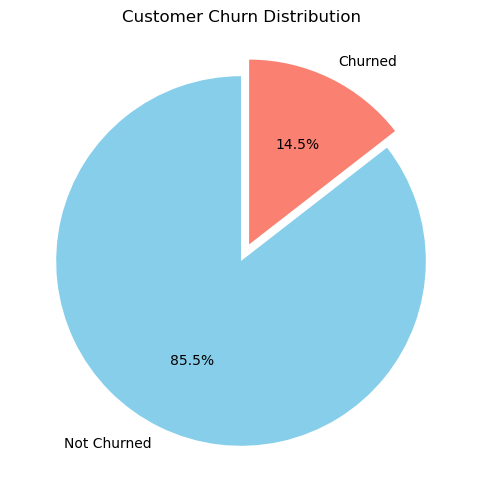

In [954]:
# Count churn 
churn_counts = df['churn'].value_counts()
labels = ['Not Churned', 'Churned']
colors = ['skyblue', 'salmon']

# pie chart
plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, explode=(0, 0.1))
plt.title('Customer Churn Distribution')
plt.show()


####  Distributions of features

##### a) Numeric Features 

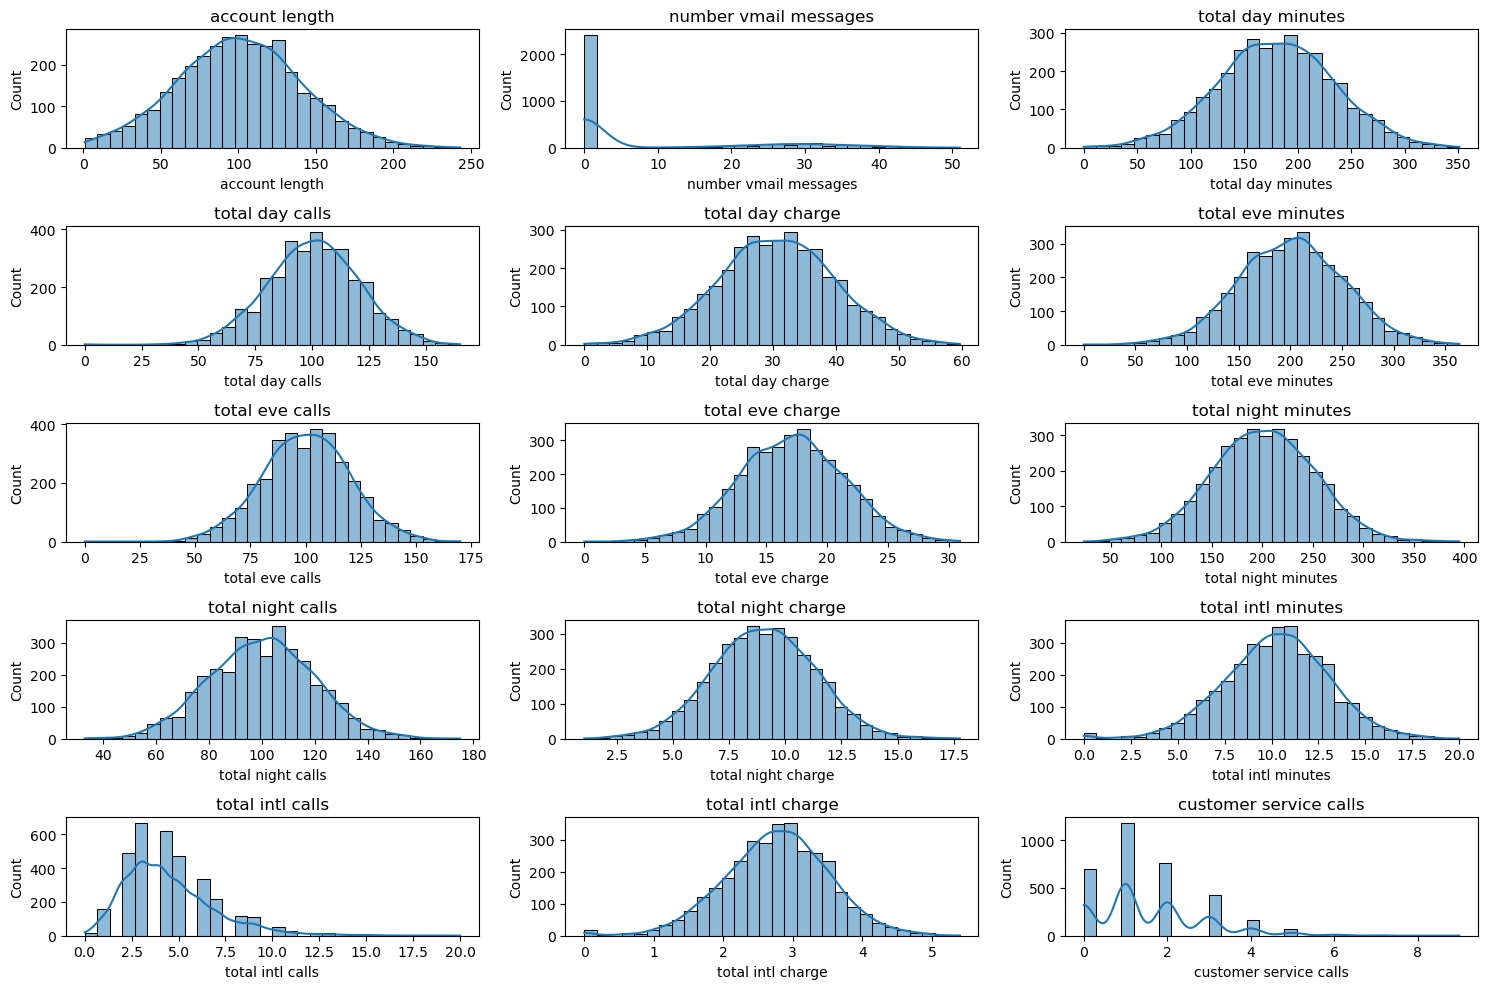

In [955]:
# Numerical features
numerical_features = ['account length', 'number vmail messages', 'total day minutes', 
                      'total day calls', 'total day charge', 'total eve minutes', 
                      'total eve calls', 'total eve charge', 'total night minutes', 
                      'total night calls', 'total night charge', 'total intl minutes', 
                      'total intl calls', 'total intl charge', 'customer service calls']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(5, 3, i)
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(feature)
plt.tight_layout()
plt.show()

- Observation:
   - Most customers have had accounts for around 100 days, with fewer people being very new or very old customers.
   - Majority of the customers talk moderate amount of minutes during the day, with fewer people talking too little or too much.
   - Customers make between 80 to 120 calls per day. This reflect engagement and a sudden drop could signal dissatisfaction.
   - international customers are a niche but high-value segment because people spend under 10 minutes making these calls
   - Customer service calls is a Key churn indicator because the more they call, the more likely they are thinking of leaving.

##### b) Categorical Variables

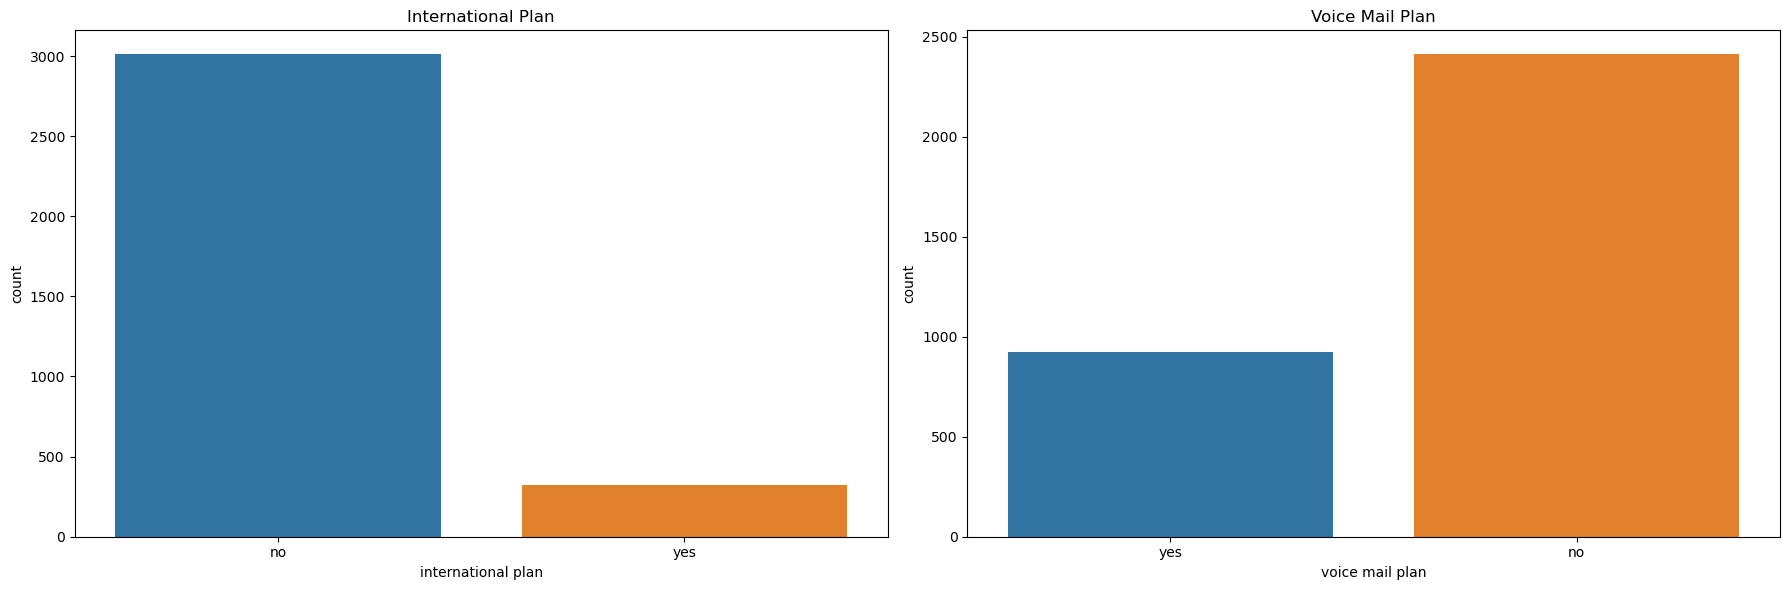

In [956]:
# Set up the figure and axes for the subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot for 'international plan'
sns.countplot(x='international plan', data=df, ax=axes[0])
axes[0].set_title('International Plan')

# Plot for 'voice mail plan'
sns.countplot(x='voice mail plan', data=df, ax=axes[1])
axes[1].set_title('Voice Mail Plan')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

  - Low voicemail or international use signals potential areas to grow or customers at risk of switching to more tailored providers.

##### Correlation  

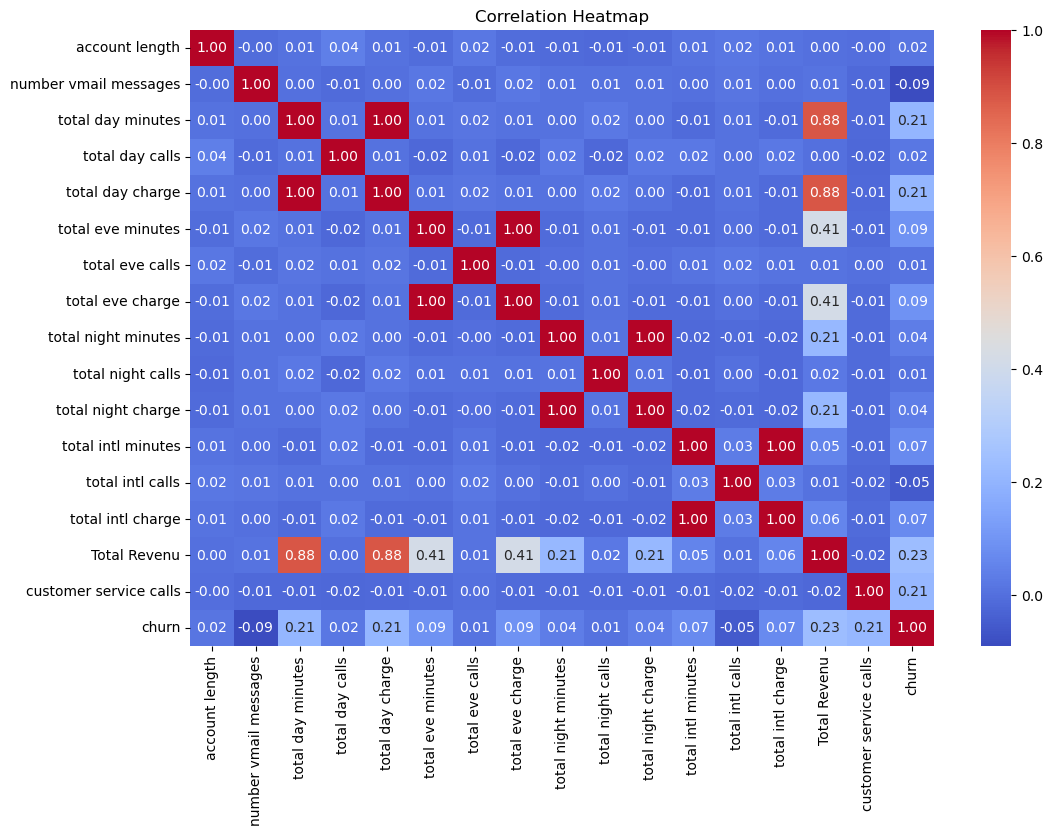

In [957]:
# correlation
correlation_matrix = df.corr(numeric_only=True)

# heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


- Positive Correlations: Features like customer service calls, total day minutes, and total day charge show a positive correlation with churn, indicating that higher usage in these areas is associated with a higher likelihood of customer churn.

- Negative Correlations: Features such as number vmail messages and total intl calls show a negative correlation with churn, suggesting that higher usage in these areas might reduce the likelihood of churn.

- Weak or Negligible Correlations: Several features like total night calls and account length have little to no correlation with churn, indicating minimal influence on the likelihood of a customer churning.

In [958]:
## Dropping Features with High Correlation to pair (98% or more)

#Dropping the highly correlated features
to_drop = df.drop(columns=['total day charge', 'total eve charge', 'total night charge', 'total intl charge'], inplace=True)

print("Reduced df shape:", df.shape)

Reduced df shape: (3333, 18)


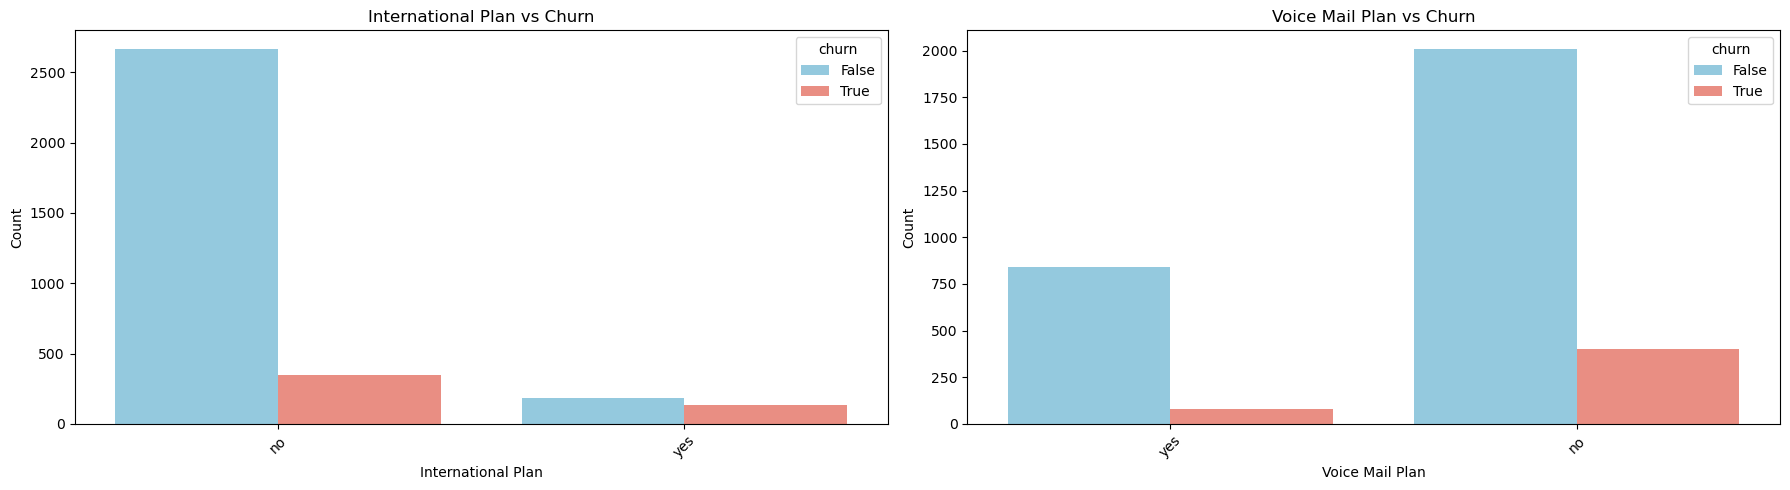

In [959]:
# Custom plot colors
custom_palette = {True: 'salmon', False: 'skyblue'}

categorical_vars = ['international plan', 'voice mail plan']

fig, axes = plt.subplots(1, 2, figsize=(18, 5))

for i, col in enumerate(categorical_vars):

    sns.countplot(x=col, hue='churn', data=df, ax=axes[i], palette=custom_palette)

    axes[i].set_title(f'{col.title()} vs Churn')

    axes[i].set_ylabel('Count')

    axes[i].set_xlabel(col.title())

    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()

plt.show()


### Factors that may Contribute to Churning
1. Location
2. Tenure

#### Geographic Churn Analysis
- To support the company’s location based retention strategy, I identified which U.S. states have the highest number of churned customers.
- I visualized the churn intensity where darker red states represent higher churn. This helps the company to:
     - Prioritize outreach efforts and marketing campaigns in high-churn states.
     - Design targeted interventions by region.
     - Recognize mid-level churn areas, which may be easier to retain with less effort

In [960]:
# Mapping state codes to full names for better readability
us_state_abbrev = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 
    'CA': 'California', 'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware',
    'FL': 'Florida', 'GA': 'Georgia', 'HI': 'Hawaii', 'ID': 'Idaho', 
    'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas', 
    'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland', 
    'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi',
    'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada',
    'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico', 
    'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 
    'OH': 'Ohio', 'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania',
    'RI': 'Rhode Island', 'SC': 'South Carolina', 'SD': 'South Dakota', 
    'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont',
    'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia', 
    'WI': 'Wisconsin', 'WY': 'Wyoming'
}

# Standardization - Removing any spaces and converting to uppercase
df['state'] = df['state'].str.strip().str.upper()

# Replacing State codes with full names
df['state_full'] = df['state'].map(us_state_abbrev)

# Filtering Churned Customers & Counting by State
churn_by_state = df[df['churn']].groupby('state').size().reset_index(name='churn_count')

# Maping Churn Distribution by State
fig = px.choropleth(
    churn_by_state,
    locations='state',                # state code
    locationmode='USA-states',        # I'm using state codes
    color='churn_count',              # Column to use for color
    scope='usa',                      # Only show the US
    color_continuous_scale='Reds',    # Red scale = more churn
    labels={'churn_count': 'Churns'},
    title='Churn Count by State'
)

fig.show()


- Washington, New jersey & Texas have the highest customers who have churned
- Majority of other states reflect a moderate level of churn and shouldn't be overlooked when designing region-specific retention strategies

#### Tenure Analysis
- To understand how customer longevity influences churning, I analyzed how long each customer has been with the company (in days).

- *Are newer customers more likely to churn or do long-term customers tend to stay?*


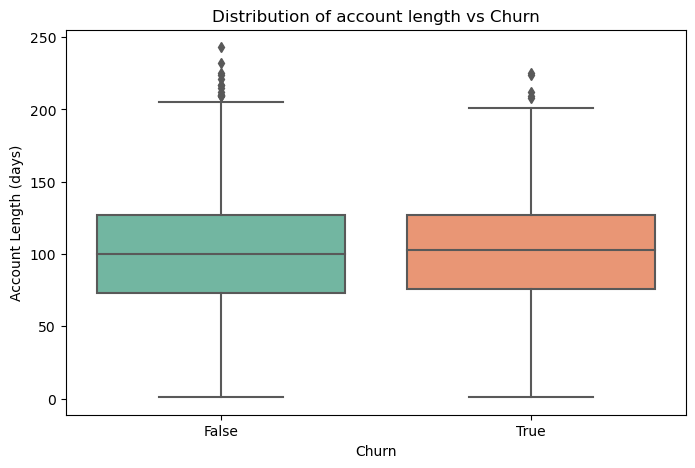

In [961]:
# Visualizing Box Plot Account Length vs Churn

plt.figure(figsize=(8, 5))
sns.boxplot(x='churn', y='account length', data=df, palette='Set2')
plt.title('Distribution of account length vs Churn')
plt.xlabel('Churn')
plt.ylabel('Account Length (days)')
plt.show()


- Observation:
   - The spread and median of tenure for churned and non-churned customers look very similar.
   - Both groups have a median around 100 days.
   - Churned customers do not appear to have dramatically shorter or longer tenures compared to loyal ones.

- Conclusion:
   - Account length alone is not a strong predictor of churn, since the difference between groups is small.

C:\Users\A808865\AppData\Local\Temp\ipykernel_21380\407809180.py:3: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\A808865\AppData\Local\Temp\ipykernel_21380\407809180.py:4: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




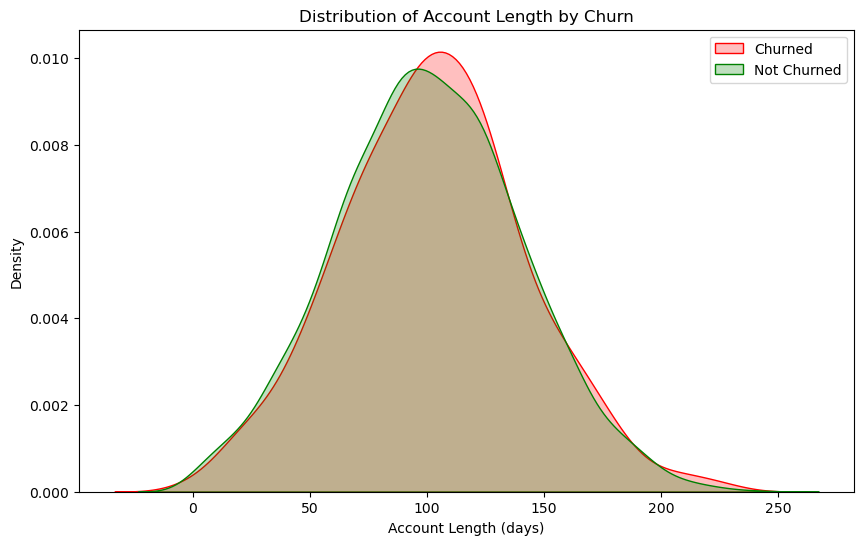

In [962]:
# Visualizing Distribution of Account Length by Churn using Kernel Density Estimation (KDE)
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df['churn'] == True]['account length'], label='Churned', shade=True, color='red')
sns.kdeplot(df[df['churn'] == False]['account length'], label='Not Churned', shade=True, color='green')
plt.title('Distribution of Account Length by Churn')
plt.xlabel('Account Length (days)')
plt.legend()
plt.show()


- Observation:
   - Both groups have a very similar shape, peaking around 90–100 days.
   - The red curve (churned) is slightly shifted right, meaning churned customers may have stayed slightly longer on average.
   - The difference is very minimal (~2 days) as there’s no major shift or skew.

To confirm that the churned customers have stayed slightly longer on average, I grouped customers by Tenure to see their Churn Rate

In [963]:
# Defining tenure groups
df['tenure_group'] = pd.cut(df['account length'], bins=[0, 50, 100, 150, 200, 250], labels=['Very New Customers', 'New Customers', 'Mid Customers', 'Long Customers', 'Very Long Customers'])

# Calculating churn rate per group and format as percentage
churn_by_group = df.groupby('tenure_group')['churn'].mean()* 100
churn_by_group = churn_by_group.round(2)  # round to 2 decimal places

print(churn_by_group)


tenure_group
Very New Customers     12.90
New Customers          14.36
Mid Customers          14.85
Long Customers         14.55
Very Long Customers    23.08
Name: churn, dtype: float64


- Observation:
   - Customers in the “Very Long” group (the most loyal) have the highest churn rate while those in the other groups have churn rates between 12–15%, relatively flat.

- Conclusion:
   - Customers with the longest tenure show the highest churn rate, highlighting that even loyal users are at risk and should be actively re-engaged.


#### Usage Behavior Analysis
- To understand whether customer activity levels influence churn, I analyzed usage patterns across different time periods and services to see if low or high engagement is linked to a higher likelihood of churn.

In [964]:
usage_columns = [
    'total day calls', 'total day minutes',
    'total eve calls', 'total eve minutes',
    'total night calls', 'total night minutes',
    'total intl calls', 'total intl minutes']

# Grouping by churn and calculating mean usage
usage_summary = df.groupby('churn')[usage_columns].mean().round(2)
usage_summary


,total day calls,total day minutes,total eve calls,total eve minutes,total night calls,total night minutes,total intl calls,total intl minutes
churn,,,,,,,,
False,100.28,175.18,100.04,199.04,100.06,200.13,4.53,10.16
True,101.34,206.91,100.56,212.41,100.40,205.23,4.16,10.70


- Customers who churn tend to use more minutes across all time periods, especially during the day. This may suggest other factors i.e overuse, dissatisfaction with costs, or unmet expectations.
- The number of calls (day, evening, night, international) remains nearly the same between both groups.


#### Financial Impact.
- To assess whether high charges contribute to customer churn, I analyzed total charges across different time periods (day, evening, night, and international).

ValueError: Could not interpret input 'total day charge'

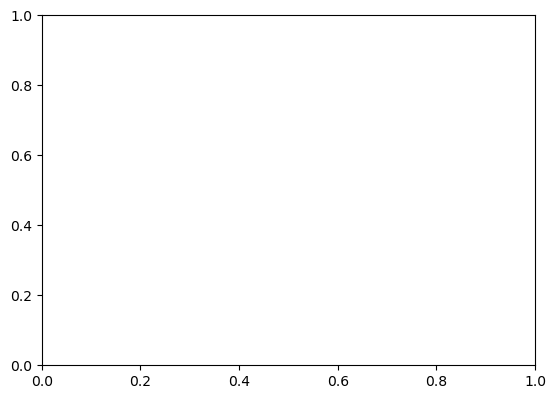

In [965]:

charge_columns = [
    'total day charge',
    'total eve charge',
    'total night charge',
    'total intl charge']

plt.figure(figsize=(14, 10))

for i, col in enumerate(charge_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='churn', y=col, data=df, palette='Set2')
    plt.title(f'{col} vs Churn')
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()


In [ ]:
# Mean Comparison
df.groupby('churn')[charge_columns].mean()


KeyError: "Columns not found: 'total eve charge', 'total day charge', 'total night charge', 'total intl charge'"

- On average, churned customers paid higher charges across all time periods espicially daytime:
    - Day Charge: 35.18 (churned) vs. 29.78 (not churned)
    - Evening Charge: 18.05 vs. 16.92
    - Night Charge: 9.24 vs. 9.01
    - International Charge: 2.89 vs. 2.74



#### Customer Support Interaction 
To assess whether customer dissatisfaction drives churn, I examined the number of customer service calls made, as repeated contact with support may indicate unresolved issues or frustration.

In [966]:
# Average customer service calls for churned vs non-churned
mean_calls = df.groupby('churn')['customer service calls'].mean()
print("Average Customer Service Calls by Churn:")
print(mean_calls)

Average Customer Service Calls by Churn:
churn
False    1.449825
True     2.229814
Name: customer service calls, dtype: float64


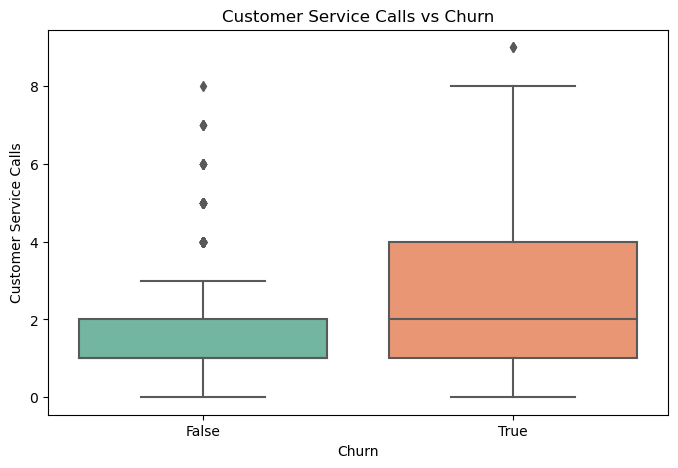

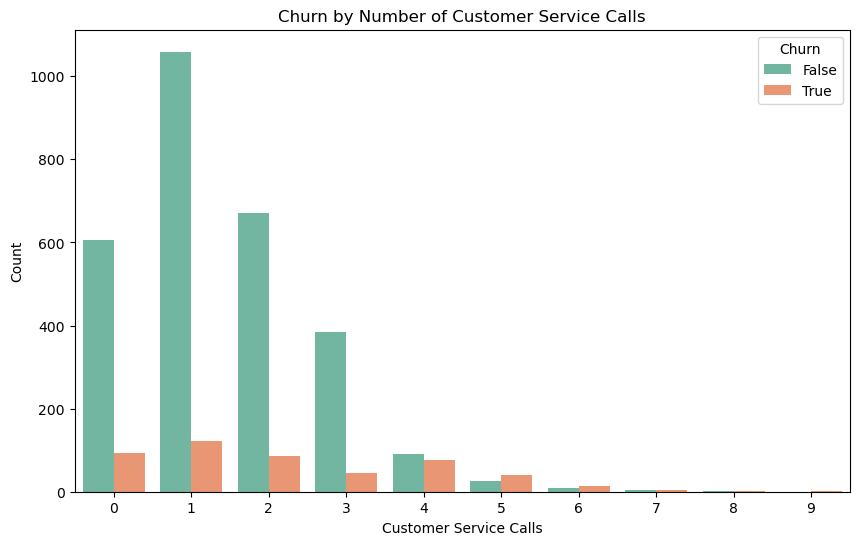

In [967]:
# Visualizing Customer Service Calls vs Churn
# Boxplot
plt.figure(figsize=(8,5))
sns.boxplot(x='churn', y='customer service calls', data=df, palette='Set2')
plt.title('Customer Service Calls vs Churn')
plt.xlabel('Churn')
plt.ylabel('Customer Service Calls')
plt.show()

# Countplot
plt.figure(figsize=(10,6))
sns.countplot(x='customer service calls', hue='churn', data=df, palette='Set2')
plt.title('Churn by Number of Customer Service Calls')
plt.xlabel('Customer Service Calls')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.show()


- Churned customers made significantly more customer service calls on average (2.23) compared to those who stayed (1.45).
- The churn rate increases sharply with the number of service calls:
      - Churn decreases with lower support calls, especially for long-tenure customers
      - Once customers hit 5 or more service calls, churn shoots up (above 50%+) indicating rising dissatisfaction


#### Service Plan
To understand the impact of service subscriptions on churn, I examined whether having an international plan or a voice mail plan made customers more or less likely to churn.

In [969]:
# Crosstab for International Plan
intl_plan_churn = pd.crosstab(df['international plan'], df['churn'], normalize='index')
print("Churn Rate by International Plan:")
print(intl_plan_churn)

# Crosstab for Voice Mail Plan
vmail_plan_churn = pd.crosstab(df['voice mail plan'], df['churn'], normalize='index')
print("\n Churn Rate by Voice Mail Plan:")
print(vmail_plan_churn)


Churn Rate by International Plan:
churn                  False     True 
international plan                    
no                  0.885050  0.114950
yes                 0.575851  0.424149

 Churn Rate by Voice Mail Plan:
churn               False     True 
voice mail plan                    
no               0.832849  0.167151
yes              0.913232  0.086768


- Customers with an international plan churn much more than those without it.
- Customers with a voice mail plan churn less than those without it.

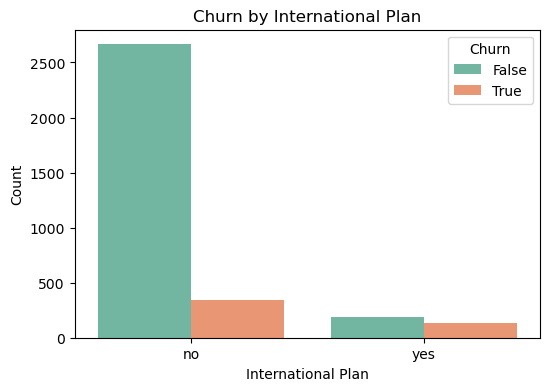

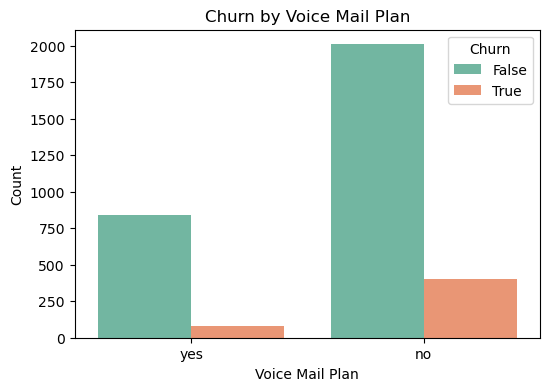

In [970]:

# Plot for International Plan
plt.figure(figsize=(6,4))
sns.countplot(x='international plan', hue='churn', data=df, palette='Set2')
plt.title('Churn by International Plan')
plt.xlabel('International Plan')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.show()

# Plot for Voice Mail Plan
plt.figure(figsize=(6,4))
sns.countplot(x='voice mail plan', hue='churn', data=df, palette='Set2')
plt.title('Churn by Voice Mail Plan')
plt.xlabel('Voice Mail Plan')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.show()


- High customer service calls + international plan + short tenure is the strongest combined risk factor for churn.
- These customers face issues early, Pay more for international usage and have poor support experiences
- The companz Should Prioritize retention by setting up early-warning systems to flag these combinations and enhance onboarding and issue resolution

#### Financial Impact

In [ ]:
# charge columns 
charges = ['total day charge', 'total eve charge', 'total night charge', 'total intl charge']

# Total revenue per customer
df['total_revenue'] = df[charges].sum(axis=1)

# Group by churn status and calculating revenue
revenue_by_churn = df.groupby('churn')['total_revenue'].sum().reset_index()

# Percentage contribution
total_revenue_all = df['total_revenue'].sum()
revenue_by_churn['% of Total Revenue'] = round(
    revenue_by_churn['total_revenue'] / total_revenue_all * 100, 2
)


revenue_by_churn.columns = ['Churned?', 'Total Revenue', '% of Total Revenue']
revenue_by_churn


KeyError: "None of [Index(['total day charge', 'total eve charge', 'total night charge',\n       'total intl charge'],\n      dtype='object')] are in the [columns]"

- 15% of the revenue is lost due to churned customers

Observation:
- Certain states showed higher churn rates while others had moderate level of churning.
- Very new and very long-tenure customers showed higher churn rates. Average account length was slightly higher among churned users, indicating early drop-offs and late disengagement.
- Customers with the international plan churned 4x more than those without it. Customers with the voice mail plan were more likely to stay, indicating that this service may add value or satisfaction.
- Higher day minutes and international minutes correlate moderately with churn. While overall usage differences are small, customers who churn tend to use slightly more minutes, especially during the day and internationally.
- Churned customers had higher average charges, especially for daytime and international calls.
- As the number of customer service calls increases, churn likelihood rises sharply.Customers making 4 or more support calls are high risk, implying service issues may go unresolved or cause frustration.


Recomendation:
- Run localized campaigns in high-churn states (Washington, Texas). Investigate regional issues (e.g., service quality, network coverage, billing concerns).
- Develop onboarding and loyalty programs for new customers to reduce early churn.
- Monitor customers with 3+ service calls and flag them for priority handling. Train support teams to resolve issues effectively during the first contact.
- Since churn is higher among customers with the international plan, review it's pricing or call quality. Consider bundling this plan with benefits 
- Customers with the voice mail plan churn less, consider promoting this as a default add-on.
- Customers paying more (especially for daytime and international calls) tend to churn more. Introduce usage alerts or spend caps.



#### Dropping Columns

In [971]:
df.drop(columns=['state', 'area code', 'phone number', 'Unnamed: 21', 'High Day Minutes', 'Total Revenu', 'state_full',	'tenure_group',	'total_revenue'], errors='ignore', inplace=True)
df.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,churn
0,36,no,yes,30,146.3,128,162.5,80,129.3,109,14.5,6,0,False
1,104,no,no,0,278.4,106,81.0,113,163.2,137,9.8,5,1,False
2,78,no,no,0,225.1,67,199.2,127,175.5,102,14.6,2,0,False
3,110,no,no,0,100.1,90,233.3,93,204.4,57,11.1,8,3,False
4,127,no,no,0,182.3,124,169.9,110,184.0,116,9.3,3,1,False


#### Bianary Encoding
Transforming categorical features into dummy variables as 0 and 1 to be able to use them in classification models.

In [972]:
categorical_columns = ['international plan', 'voice mail plan', 'churn']

# Mapping for binary categoricals
df['international plan'] = df['international plan'].map({'yes': 1, 'no': 0})
df['voice mail plan'] = df['voice mail plan'].map({'yes': 1, 'no': 0})
df['churn'] = df['churn'].astype(int)  # Convert bool to 0/1


df.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,churn
0,36,0,1,30,146.3,128,162.5,80,129.3,109,14.5,6,0,0
1,104,0,0,0,278.4,106,81.0,113,163.2,137,9.8,5,1,0
2,78,0,0,0,225.1,67,199.2,127,175.5,102,14.6,2,0,0
3,110,0,0,0,100.1,90,233.3,93,204.4,57,11.1,8,3,0
4,127,0,0,0,182.3,124,169.9,110,184.0,116,9.3,3,1,0


#### Defining features & target variable

In [973]:
# churn is the target variable
X = df.drop('churn', axis=1)
y = df['churn']


#### Scaling/Normalizing Features
To ensure all features contribute equally to the model, we might need to scale or normalize them.

In [974]:
from sklearn.preprocessing import StandardScaler

# Scaling


# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Converting back to DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

X_scaled_df.head()


,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls
0,-1.634132,-0.32758,1.617086,1.600211,-0.614682,1.373680,-0.758888,-1.009773,-1.415411,0.454484,1.527074,0.617898,-1.188218
1,0.073719,-0.32758,-0.618396,-0.591760,1.810986,0.277302,-2.366185,0.646884,-0.745003,1.885562,-0.156656,0.211534,-0.427932
2,-0.579283,-0.32758,-0.618396,-0.591760,0.832272,-1.666277,-0.035111,1.349708,-0.501758,0.096715,1.562898,-1.007560,-1.188218
3,0.224411,-0.32758,-0.618396,-0.591760,-1.463023,-0.520064,0.637390,-0.357151,0.069769,-2.203232,0.309056,1.430627,1.092641
4,0.651374,-0.32758,-0.618396,-0.591760,0.046363,1.174338,-0.612949,0.496279,-0.333662,0.812254,-0.335777,-0.601195,-0.427932


#### Train-Test Split

This divides the dataset into a training set and a testing set. 
Typically, we allocate 70-80% of the data for training and the remaining 20-30% for testing. This allows us to train the model on one portion of the data and evaluate its performance on unseen data.

In [975]:
from sklearn.model_selection import train_test_split


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Confirm the split
print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")


Training set size: (2666, 13)
Testing set size: (667, 13)


### Handle imbalance on training data
- Since churn is rare in my dataset, models will be biased toward predicting “No Churn.”
   - Oversampling (e.g., SMOTE)


In [ ]:
# Handling Imbalance in Training Data

from imblearn.over_sampling import SMOTE

# Applying SMOTE only to training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(f"Before SMOTE: {y_train.value_counts()}")
print(f"After SMOTE: {y_train_resampled.value_counts()}")




ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (c:\Users\A808865\Python\Lib\site-packages\sklearn\utils\_param_validation.py)

## Modeling

#### Exporting Excel file

In [ ]:
import pandas as pd

# Step 1: Read the data (use double backslashes or raw string for Windows paths)
df = pd.read_csv(r'Data\Customer_churn.csv')


# Step 3: Export the result to a new Excel file
output_path = r'Data\Customer_churn_with_analysis.xlsx'
df.to_excel(output_path, index=False)

print(f"Analysis exported successfully to {output_path}")



PermissionError: [Errno 13] Permission denied: 'Data\\Customer_churn_with_analysis.xlsx'